In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [4]:
# useful stuff

district_labels = [ 'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais',
'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte',  
'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins' ]

district_names = ['acre', 'alagoas', 'amapas', 'amazonas', 'bahia', 'ceara', 'distrito_federal', 'espirito_santo',
           'goias', 'maranhao', 'mato_grosso', 'mato_grosso_do_sul', 'minas_gerais', 'para', 'paraiba', 'parana',
           'pernambuco', 'piaui', 'rio_de_janeiro', 'rio_grande_do_norte', 'rio_grande_do_sul', 'rondonia',
           'roraima', 'santa_catarina', 'sao_paulo', 'sergipe', 'tocantins']

district_codes = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 
                  'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

districts_by_region = { 'North': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins'], 
  'North-East': [ 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco',
                  'Alagoas', 'Sergipe', 'Bahia'], 
  'South-East': ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo'], 
  'South': ['Paraná', 'Santa Catarina', 'Rio Grande do Sul'], 
  'Center-West' : ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'] }

label2name = { district_labels[i] : name for i, name in enumerate( district_names ) }
label2code = { district_labels[i] : code for i, code in enumerate( district_codes ) }
code2name  = { district_codes[i] : name for i, name in enumerate( district_names ) }
name2code  = { name : code for code, name in code2name.items() }
code2label = { code : label for label, code in label2code.items() }

code2region = {}
codes_by_region = {}
for region, districts in districts_by_region.items():
    codes_by_region[region] = []
    for label in districts:
        code = label2code[label]
        code2region[code] = region
        codes_by_region[region].append( code )
        
region2color = { 'North': '#7570b3', 'North-East': '#d95f02', 'South-East': '#e7298a', 
                'South': '#1b9e77', 'Center-West': '#e6ab02'}
codes = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 
         'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
zikv_ar = [0.17024886877828055, 0.7358597285067874, 0.3404977375565611, 0.2703619909502262, 0.5876696832579186, 0.36199095022624433, 0.16855203619909503, 0.4236425339366516, 0.2816742081447964, 0.41798642533936653, 0.5197963800904978, 0.13687782805429866, 0.1159502262443439, 0.051470588235294115, 0.669683257918552, 0.016968325791855202, 0.6317873303167421, 0.4649321266968326, 0.27941176470588236, 0.5729638009049773, 0.05542986425339366, 0.26018099547511314, 0.45701357466063347, 0.048642533936651584, 0.083710407239819, 0.7658371040723982, 0.2703619909502262]
zikv_ar_dict = {
    'AC': 301 / 1768.,
    'AL': 1301 / 1768.,
    'AP': 602 / 1768.,
    'AM': 478 / 1768.,
    'BA': 1039 / 1768.,
    'CE': 640 / 1768.,
    'DF': 298 / 1768.,
    'ES': 749 / 1768.,
    'GO': 498 / 1768.,
    'MA': 739 / 1768.,
    'MT': 919 / 1768.,
    'MS': 242 / 1768.,
    'MG': 205 / 1768.,
    'PA': 91 / 1768.,
    'PB': 1184 / 1768.,
    'PR': 30 / 1768.,
    'PE': 1117 / 1768.,
    'PI': 822 / 1768.,
    'RJ': 494 / 1768.,
    'RN': 1013 / 1768.,
    'RS': 98 / 1768.,
    'RO': 460 / 1768.,
    'RR': 808 / 1768.,
    'SC': 86 / 1768.,
    'SP': 148 / 1768.,
    'SE': 1354 / 1768.,
    'TO': 478 / 1768.
}

region2color = { 'North': '#7570b3', 'North-East': '#d95f02', 'South-East': '#e7298a', 
                'South': '#1b9e77', 'Center-West': '#e6ab02'}

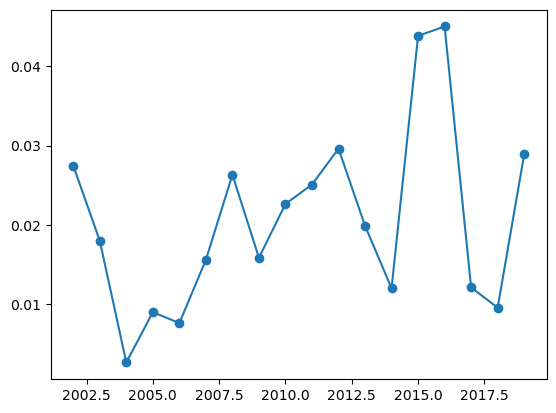

In [7]:
#== Force of infection in the Northeast of Brazil 

# These values were extracted from the second panel in Fig. 3 in the manuscript:
# Brito et Al., Lying in wait: the resurgence of dengue virus after the Zika epidemic in Brazil,
# Nature Communications, 2021 (https://www.nature.com/articles/s41467-021-22921-7)

ld = pd.DataFrame( {
    'year': range( 2002, 2020 ),
    'foi': [0.02745792, 0.01798799, 0.00264778, 0.00899015, 0.00761751,
       0.01558908, 0.02632133, 0.01585335, 0.02262931, 0.0250821 ,
       0.0295977 , 0.01988916, 0.01200739, 0.04382954, 0.04501231,
       0.01210488, 0.0095546 , 0.02887674]
})

plt.plot( ld['year'], ld['foi'], marker = 'o')

## Calculate probability of infection

The code below calculates the probability of primary (d1) and secondary (d2) dengue infections in children aged up to 9 years old in 2018 and 2019. These probability are stratified by Zika serostatus(z0:negative, z1:positive).

In [9]:
years_analysis = [2018, 2019] # years to consider
year_zikv = 2016 # year of when someone can get infected with zikv
Na = 10 # number of ages to consider

pZs = [ 0.36199095022624433, 0.7658371040723982 ] # ZIKV attack rates to explore

prob_inf_age = [ { 'd1_z0': [], 'd2_z0': [], 'd1_z1': [], 'd2_z1': [] } for pZ in pZs ]

for ipZ, pZ in enumerate( pZs ):
    for i, y in enumerate( years_analysis ):

        σ0d   = np.zeros( Na ).astype( float ) # Prob. susceptible to DENV at age a = 0,1,...
        σ0d0z = np.zeros( Na ).astype( float ) # Prob. susceptible to DENV and ZIKV at age a = 0,1,...
        σ0d1z = np.zeros( Na ).astype( float ) # Prob. susceptible to DENV but not ZIKV at age a = 0,1,...
        σ0d[0]  = 1.
        σ0d0z[0] = 1.
        for a in range( 1, Na ):

            years_pre = [y - b for b in range( 1, a + 1 ) ]
            σ0d_a = np.exp( -4*ld.loc[ld['year'].isin( years_pre ), 'foi'].sum() )

            #print( y, a, years_pre )

            if year_zikv in years_pre:
                σ0d0z_a = σ0d_a * ( 1. - pZ )
                σ0d1z_a = σ0d_a * pZ
            else:
                σ0d0z_a = σ0d_a
                σ0d1z_a = 0.

            σ0d[a]   = σ0d_a
            σ0d0z[a] = σ0d0z_a
            σ0d1z[a] = σ0d1z_a

        σ1d0z  = np.zeros( Na ).astype( float ) # Prob. 1 past DENV and no ZIKV at age a = 0,1,...
        σ1d1z  = np.zeros( Na ).astype( float ) # Prob. 1 past DENV and past ZIKV at age a = 0,1,...

        for a in range( 1, Na ):

            σ1d0z_a = 0.
            for y_inf in range( y - a, y ):           

                years_pre_inf  = list( range( y - a, y_inf ) )
                years_post_inf = list( range( y_inf + 1, y ) )
                
                pEscPre  = np.exp( -4*ld.loc[ld['year'].isin( years_pre_inf ), 'foi'].sum() )
                pEscPost = np.exp( -3*ld.loc[ld['year'].isin( years_post_inf ), 'foi'].sum() )
                pInf = 1. - np.exp( -4*ld.loc[ld['year'] == y_inf, 'foi'].values[0] )

                σ1d0z_a += pEscPre * pInf * pEscPost

                #print( y, a, y_inf, years_pre_inf, years_post_inf )

            years_pre = [y - b for b in range( 1, a + 1 ) ]
            if year_zikv in years_pre: 
                σ1d1z_a = σ1d0z_a * pZ
                σ1d0z_a = σ1d0z_a * ( 1 - pZ )
            else:
                σ1d1z_a = 0.


            σ1d0z[a] = σ1d0z_a
            σ1d1z[a] = σ1d1z_a


        #= get current DENV foi
        ly = ld.loc[ld['year'] == y, 'foi'].values[0]

        #= calculate prob. of primary DENV infection (given NOT Z) at age a in year y
        p_d1_z0 = σ0d0z * ( 1. - np.exp( -4*ly ) )

        #= calculate prob. of primary DENV infection (given Z) at age a in year y
        p_d1_z1 = σ0d1z * ( 1. - np.exp( -4*ly ) )

        #= calculate prob. of secondary DENV infection (given NOT Z) at age a in year y
        p_d2_z0 = σ1d0z * ( 1. - np.exp( -3*ly ) )   

        #= calculate prob. of secondary DENV infection (given Z) at age a in year y
        p_d2_z1 = σ1d1z * ( 1. - np.exp( -3*ly ) )   

        #= store results
        prob_inf_age[ipZ]['d1_z0'].append( p_d1_z0.copy() )
        prob_inf_age[ipZ]['d2_z0'].append( p_d2_z0.copy() )    
        prob_inf_age[ipZ]['d1_z1'].append( p_d1_z1.copy() )    
        prob_inf_age[ipZ]['d2_z1'].append( p_d2_z1.copy() )   

    for key in prob_inf_age[ipZ].keys():
        prob_inf_age[ipZ][key] = np.array( prob_inf_age[ipZ][key] )

Text(0.5, 1.0, 'Secondary DENV (w ZIKV)')

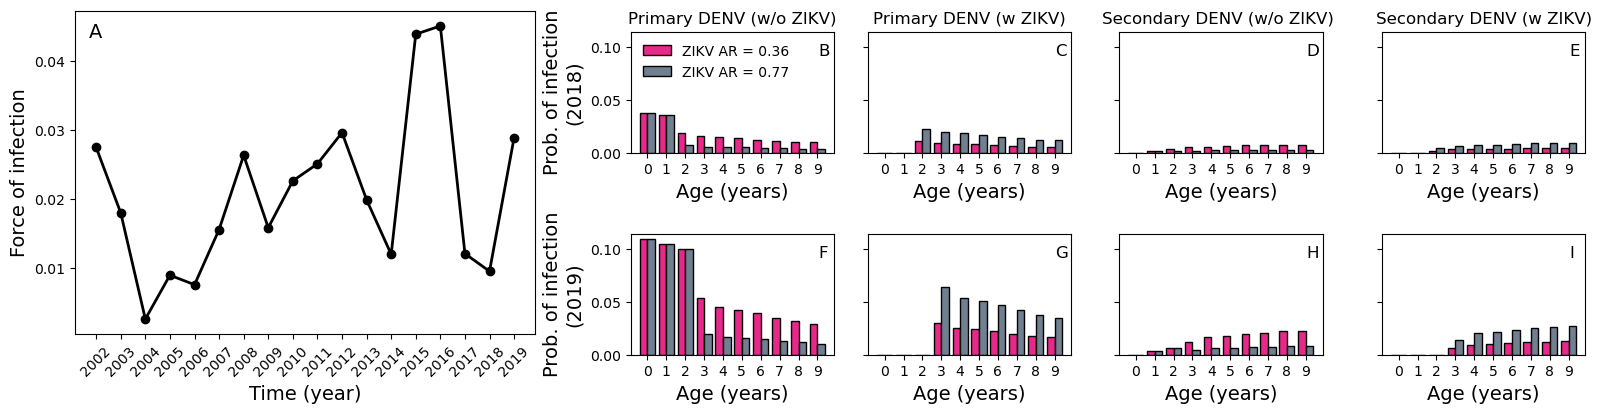

In [10]:
fig = plt.figure( figsize = ( 16, 4 ), constrained_layout = True )

#== Figure shape

gs0 = gridspec.GridSpec( 1, 2, figure=fig, width_ratios=[1,2] )

gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0])

ax0 = fig.add_subplot(gs00[0,0])

gs01 = gs0[1].subgridspec(2, 4)

ax11 = fig.add_subplot(gs01[0,0])
ax12 = fig.add_subplot(gs01[0,1], sharey = ax11)
ax13 = fig.add_subplot(gs01[0,2], sharey = ax11)
ax14 = fig.add_subplot(gs01[0,3], sharey = ax11)

ax15 = fig.add_subplot(gs01[1,0], sharey = ax11)
ax16 = fig.add_subplot(gs01[1,1], sharey = ax11)
ax17 = fig.add_subplot(gs01[1,2], sharey = ax11)
ax18 = fig.add_subplot(gs01[1,3], sharey = ax11)

plt.setp( ax12.get_yticklabels(), visible=False )
plt.setp( ax13.get_yticklabels(), visible=False )
plt.setp( ax14.get_yticklabels(), visible=False )

plt.setp( ax16.get_yticklabels(), visible=False )
plt.setp( ax17.get_yticklabels(), visible=False )
plt.setp( ax18.get_yticklabels(), visible=False )



#== Plot foi

ax0.plot( ld['year'], ld['foi'], marker = 'o', lw = 2, c = 'black' ) 
ax0.set_xlabel( 'Time (year)', fontsize = 14 )
ax0.set_ylabel( 'Force of infection', fontsize = 14 )

ax0.set_xticks( ld['year'].values )
ax0.tick_params( axis = 'x', rotation = 45 )

#== Plot prob. of infection per birth cohort


width = 0.4

fcs = { 0: '#e7298a', 1: 'slategray'}


for ipZ in [0,1]:
    
    iy = 0
    ax11.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d1_z0'][iy], fc = fcs[ipZ], ec = 'black', width = width )
    ax12.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d1_z1'][iy], fc = fcs[ipZ],ec = 'black', width = width )
    ax13.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d2_z0'][iy], fc = fcs[ipZ],ec = 'black', width = width )
    ax14.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d2_z1'][iy], fc = fcs[ipZ],ec = 'black', width = width )

    iy = 1
    ax15.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d1_z0'][iy], fc = fcs[ipZ],ec = 'black', width = width )
    ax16.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d1_z1'][iy], fc = fcs[ipZ],ec = 'black', width = width )
    ax17.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d2_z0'][iy], fc = fcs[ipZ],ec = 'black', width = width )
    ax18.bar( np.arange( Na ) + ( 2 * ipZ - 1 )*width/2, prob_inf_age[ipZ]['d2_z1'][iy], fc = fcs[ipZ],ec = 'black', width = width )

    
ax11.legend( [Rectangle([0,0],0,0,fc=fcs[0],ec='black'), Rectangle([0,0],0,0,fc=fcs[1],ec='black')],
             ['ZIKV AR = {0:.2f}'.format( pZs[0] ), 'ZIKV AR = {0:.2f}'.format( pZs[1] ) ], 
             framealpha = False, fontsize = 10, loc = 'upper left' )

ax11.set_ylabel( 'Prob. of infection\n(2018)', fontsize = 14 )
ax15.set_ylabel( 'Prob. of infection\n(2019)', fontsize = 14 )

ax11.set_xlabel( 'Age (years)', fontsize = 14 )
ax12.set_xlabel( 'Age (years)', fontsize = 14 )
ax13.set_xlabel( 'Age (years)', fontsize = 14 )
ax14.set_xlabel( 'Age (years)', fontsize = 14 )
ax15.set_xlabel( 'Age (years)', fontsize = 14 )
ax16.set_xlabel( 'Age (years)', fontsize = 14 )
ax17.set_xlabel( 'Age (years)', fontsize = 14 )
ax18.set_xlabel( 'Age (years)', fontsize = 14 )

ax0.text( 0.03, 0.92, 'A', fontsize = 14, transform = ax0.transAxes )
letters = 'BCDEFGHI'
for iax, axi in enumerate([ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18]):
    axi.set_xticks( range( Na ) )
    axi.text( 0.92, 0.8, letters[iax], fontsize = 12, transform = axi.transAxes )

ax11.set_title( 'Primary DENV (w/o ZIKV)' )
ax12.set_title( 'Primary DENV (w ZIKV)' )
ax13.set_title( 'Secondary DENV (w/o ZIKV) ' )
ax14.set_title( 'Secondary DENV (w ZIKV)' )